In [2]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\benha\Desktop\Shot-tracker


In [3]:
# Pip install method (recommended)

#!pip install ultralytics==8.0.28
#!pip install roboflow

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.124  Python-3.10.9 torch-2.0.1+cpu CPU
Setup complete  (16 CPUs, 31.9 GB RAM, 586.2/931.0 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="DKrW3OMM8rWOjv9J3m5q")
project = rf.workspace("benharasgummer-gmail-com").project("ball-hoop-tracker")
dataset = project.version(1).download("yolov8")


The syntax of the command is incorrect.


[WinError 2] The system cannot find the file specified: 'c:\\Users\\benha\\Desktop\\Shot-tracker/datasets'
c:\Users\benha\Desktop\Shot-tracker
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.124, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Ball-Hoop-Tracker-1 in yolov8:: 100%|██████████| 1708/1708 [00:00<00:00, 2301.92it/s]


In [6]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

c:\Users\benha\Desktop\Shot-tracker
^C



  0%|          | 0.00/21.5M [00:00<?, ?B/s]
  1%|          | 272k/21.5M [00:00<00:08, 2.63MB/s]
  5%|▌         | 1.10M/21.5M [00:00<00:03, 6.08MB/s]
  9%|▉         | 1.89M/21.5M [00:00<00:02, 7.00MB/s]
 13%|█▎        | 2.70M/21.5M [00:00<00:02, 7.50MB/s]
 16%|█▌        | 3.49M/21.5M [00:00<00:02, 7.75MB/s]
 20%|█▉        | 4.29M/21.5M [00:00<00:02, 7.87MB/s]
 24%|██▎       | 5.09M/21.5M [00:00<00:02, 7.98MB/s]
 27%|██▋       | 5.91M/21.5M [00:00<00:02, 8.12MB/s]
 31%|███       | 6.73M/21.5M [00:00<00:01, 8.17MB/s]
 35%|███▌      | 7.55M/21.5M [00:01<00:01, 8.30MB/s]
 39%|███▉      | 8.35M/21.5M [00:01<00:01, 8.19MB/s]
 42%|████▏     | 9.14M/21.5M [00:01<00:01, 7.84MB/s]
 46%|████▌     | 9.95M/21.5M [00:01<00:01, 7.99MB/s]
 50%|████▉     | 10.7M/21.5M [00:01<00:01, 7.93MB/s]
 53%|█████▎    | 11.5M/21.5M [00:01<00:01, 7.67MB/s]
 57%|█████▋    | 12.2M/21.5M [00:01<00:01, 7.34MB/s]
 60%|██████    | 12.9M/21.5M [00:01<00:01, 6.86MB/s]
 63%|██████▎   | 13.6M/21.5M [00:01<00:01, 6.32MB/s]
 6

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch470.jpg
events.out.tfevents.1687645574.2e09070e3183.1634.0  train_batch471.jpg
F1_curve.png					    train_batch472.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


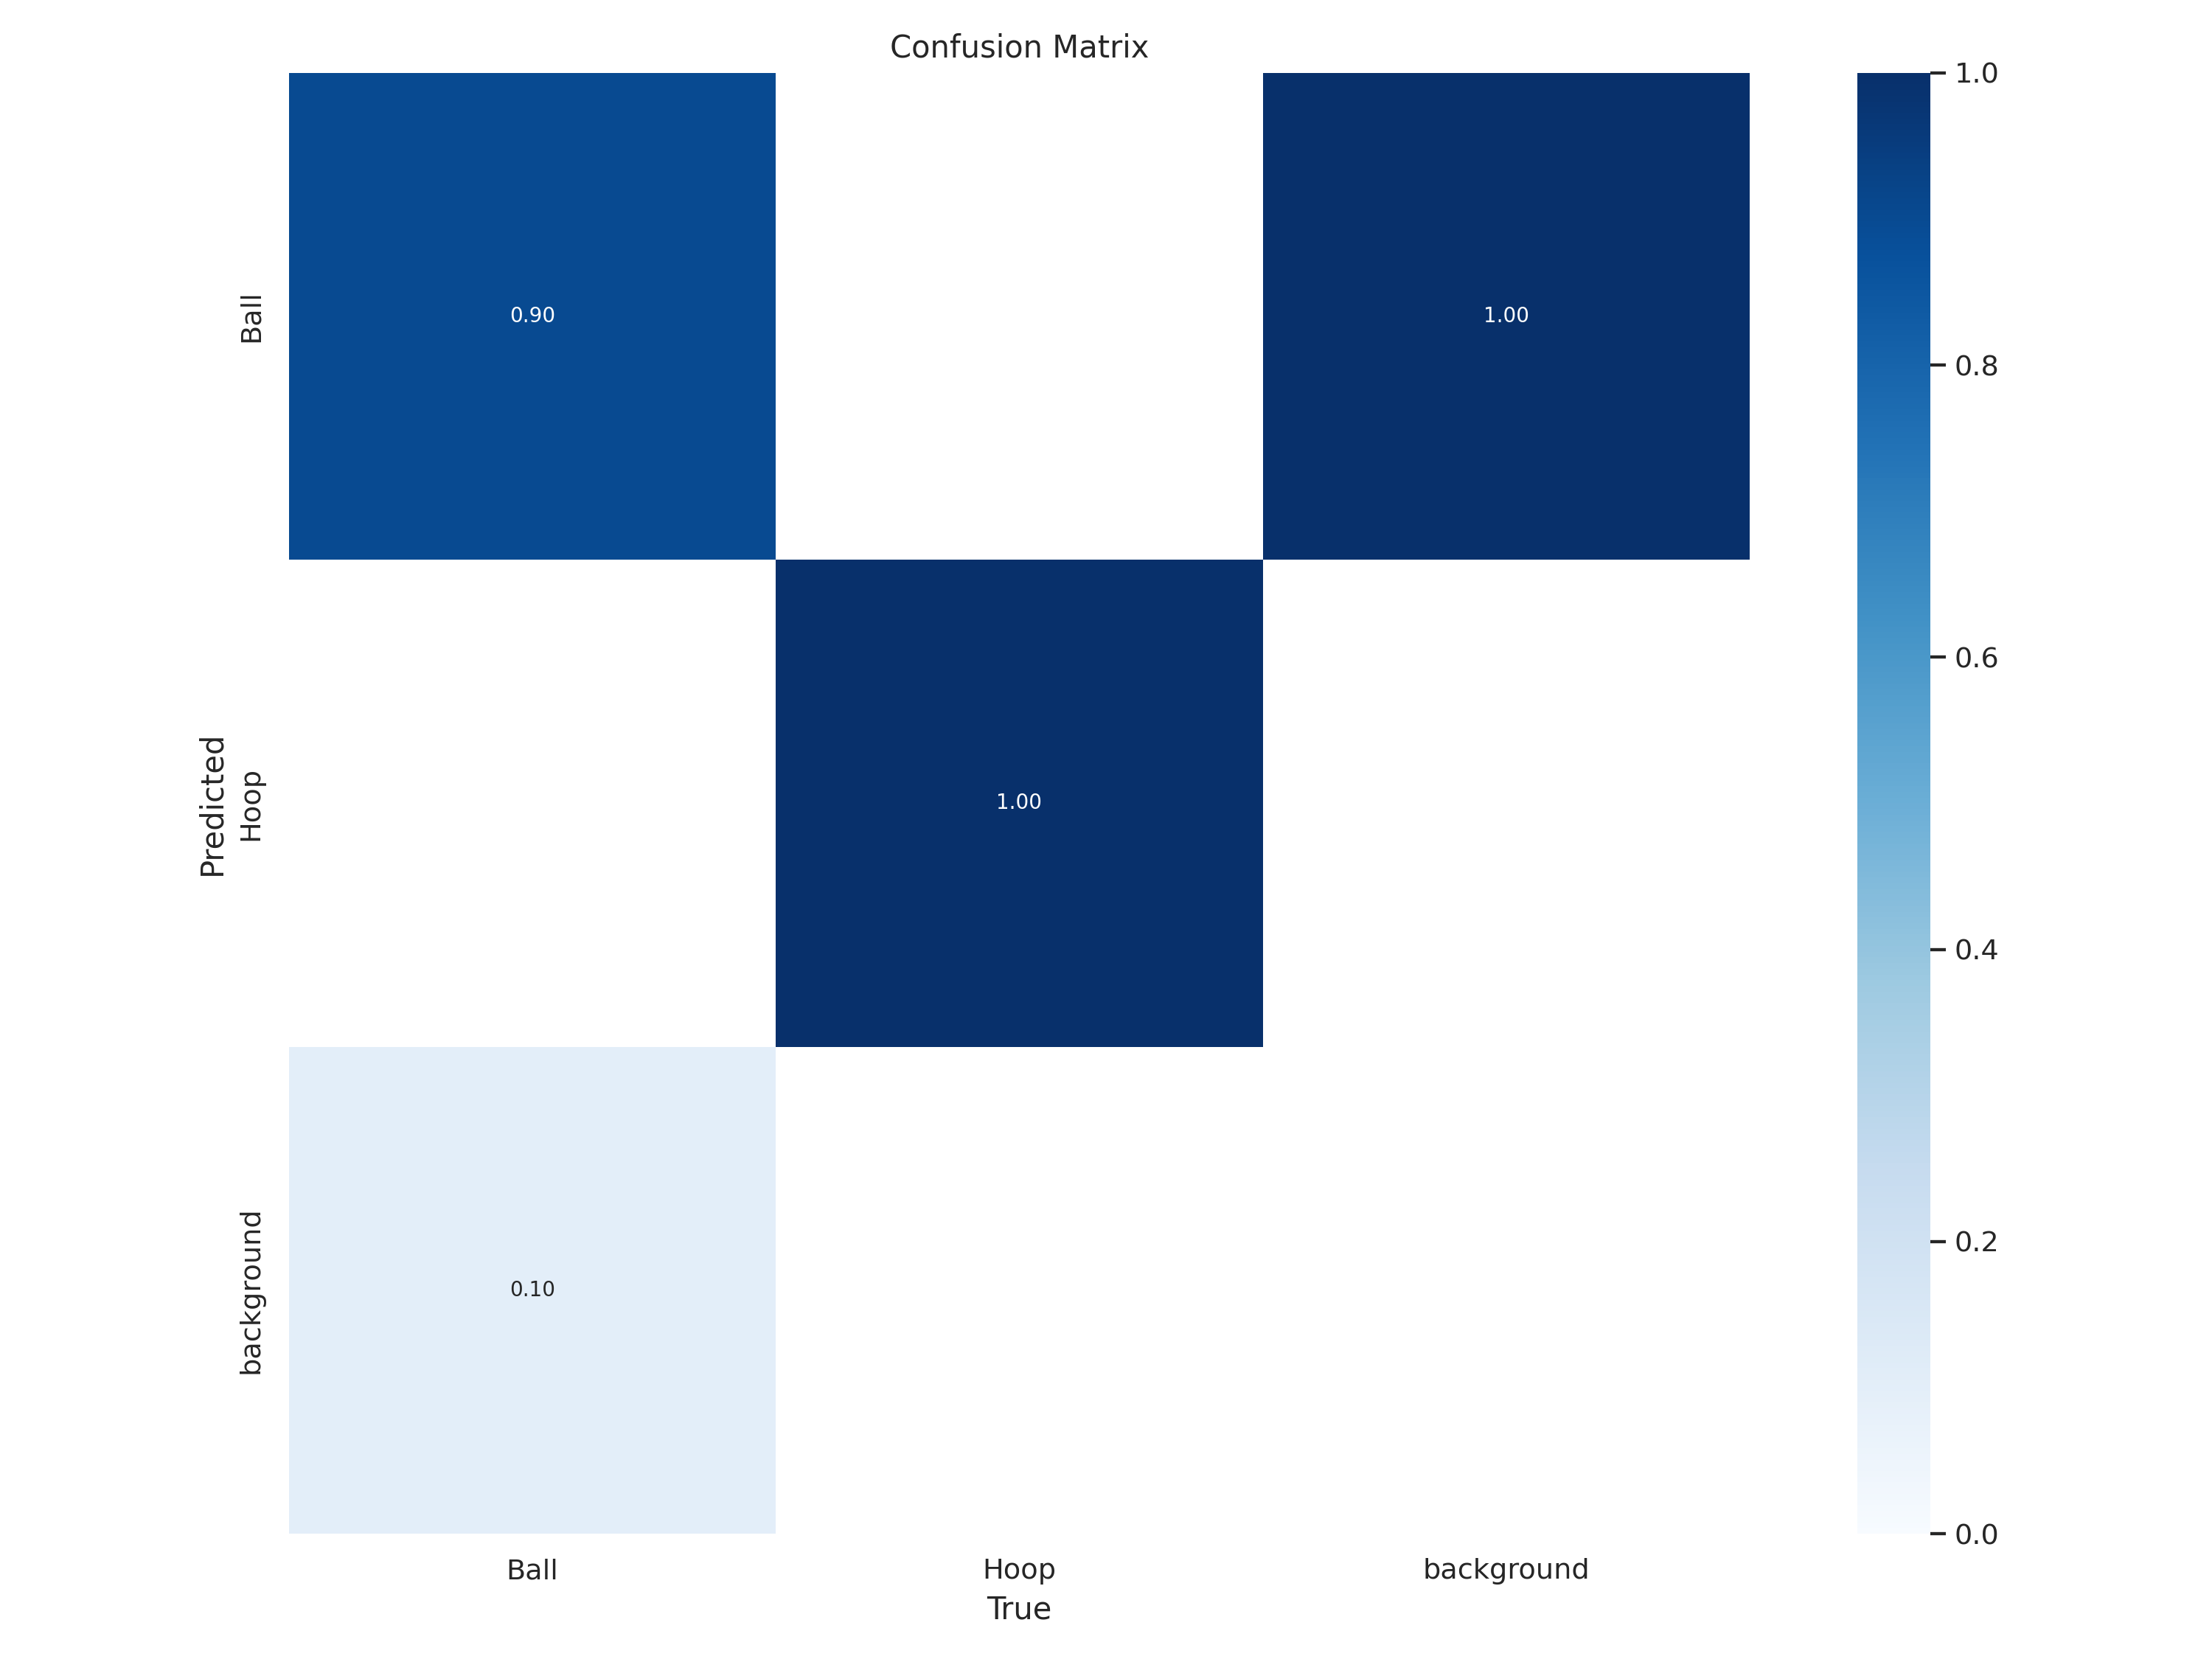

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


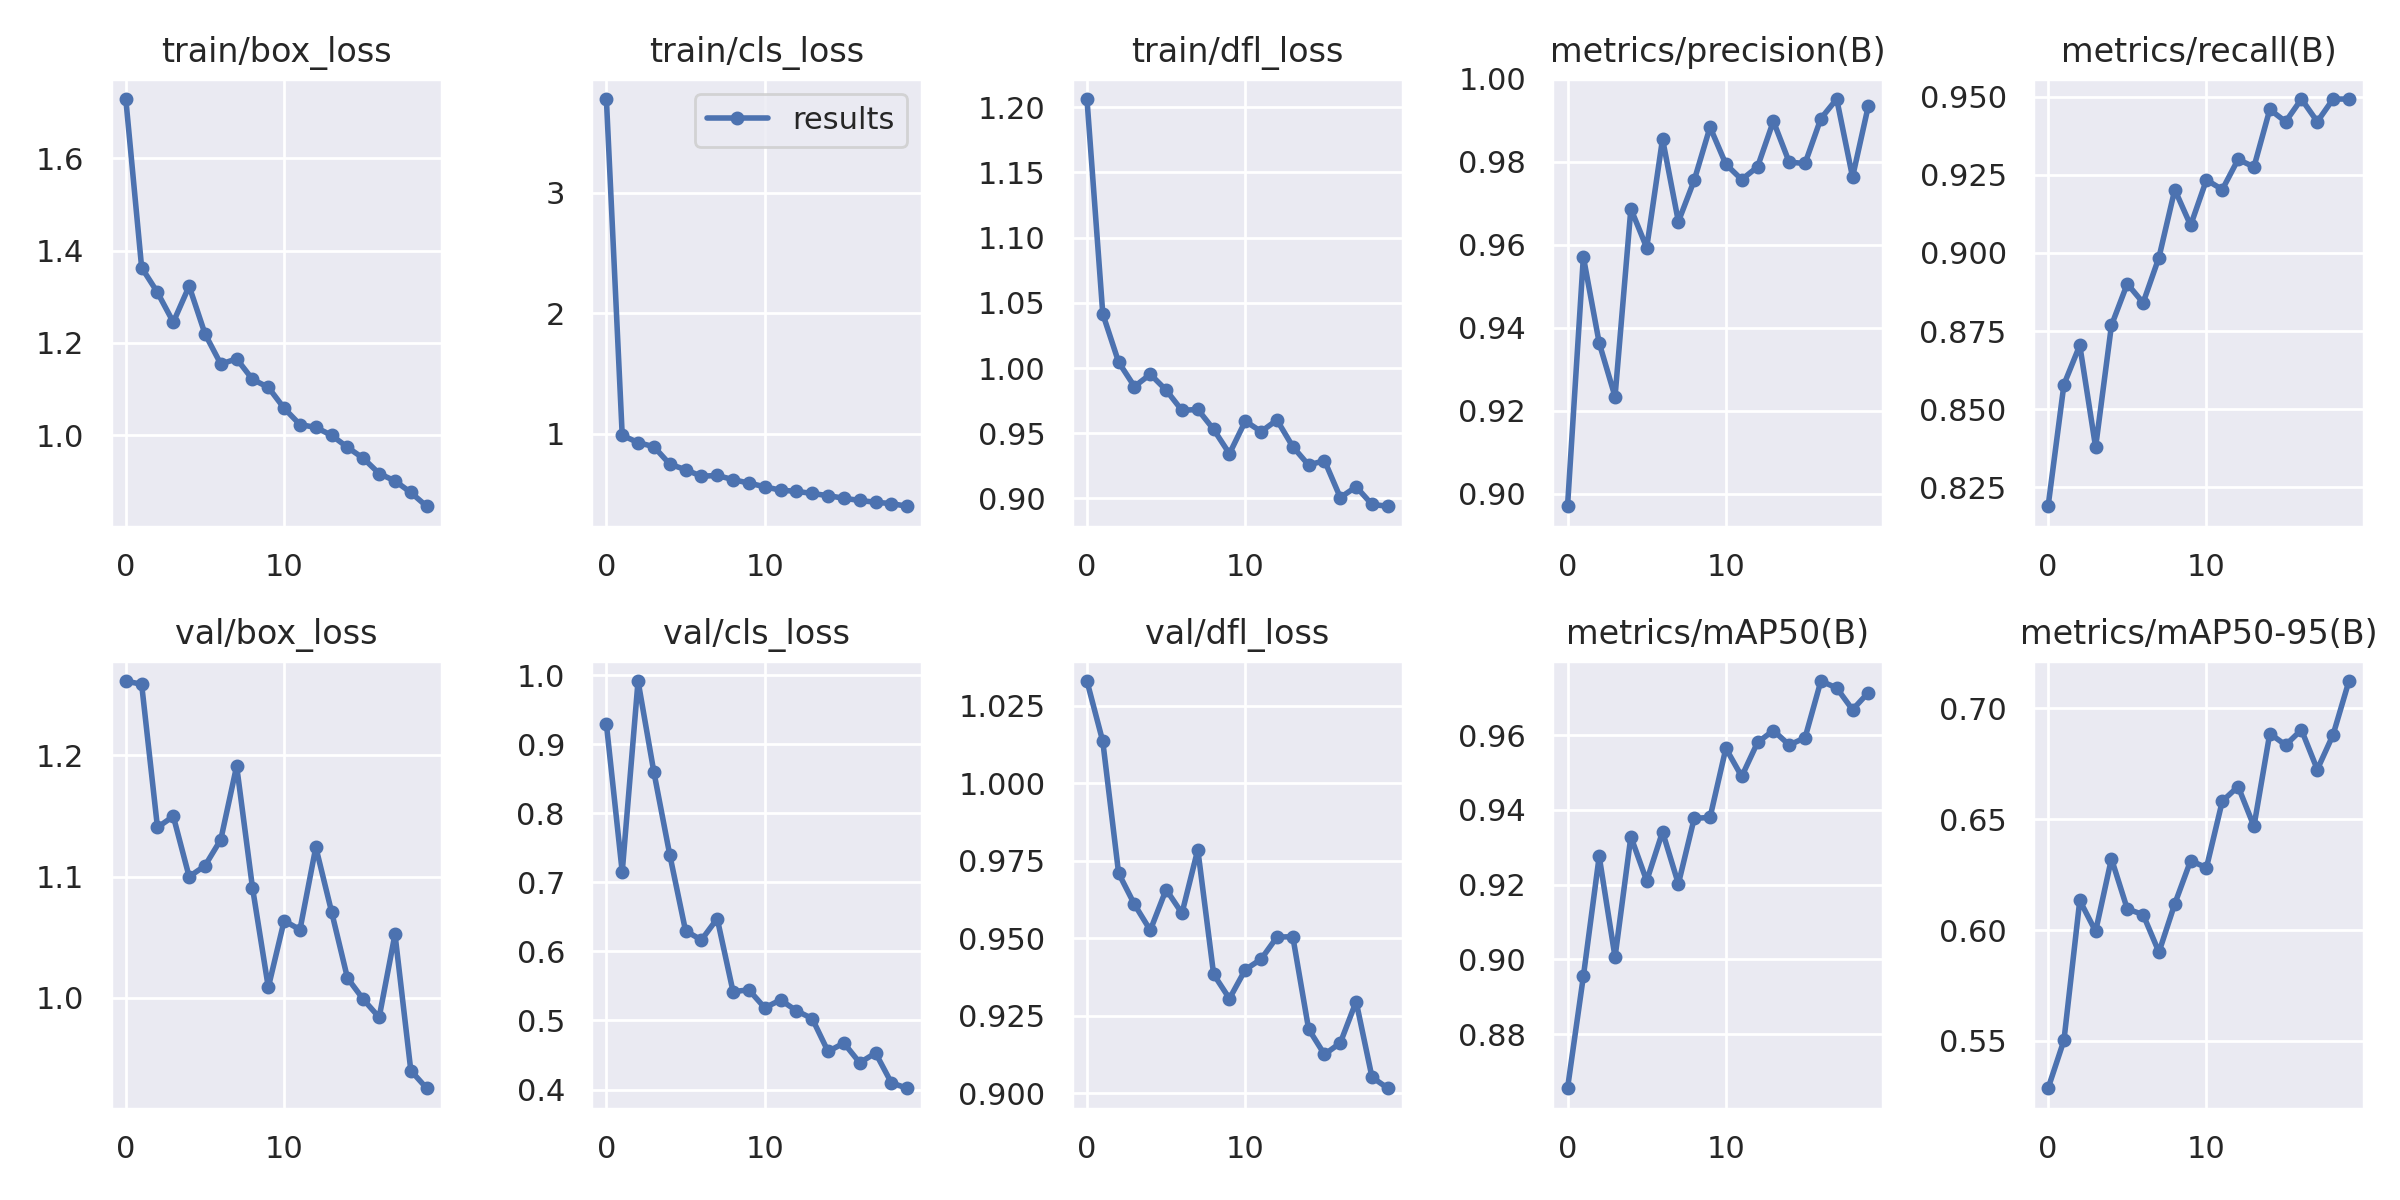

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


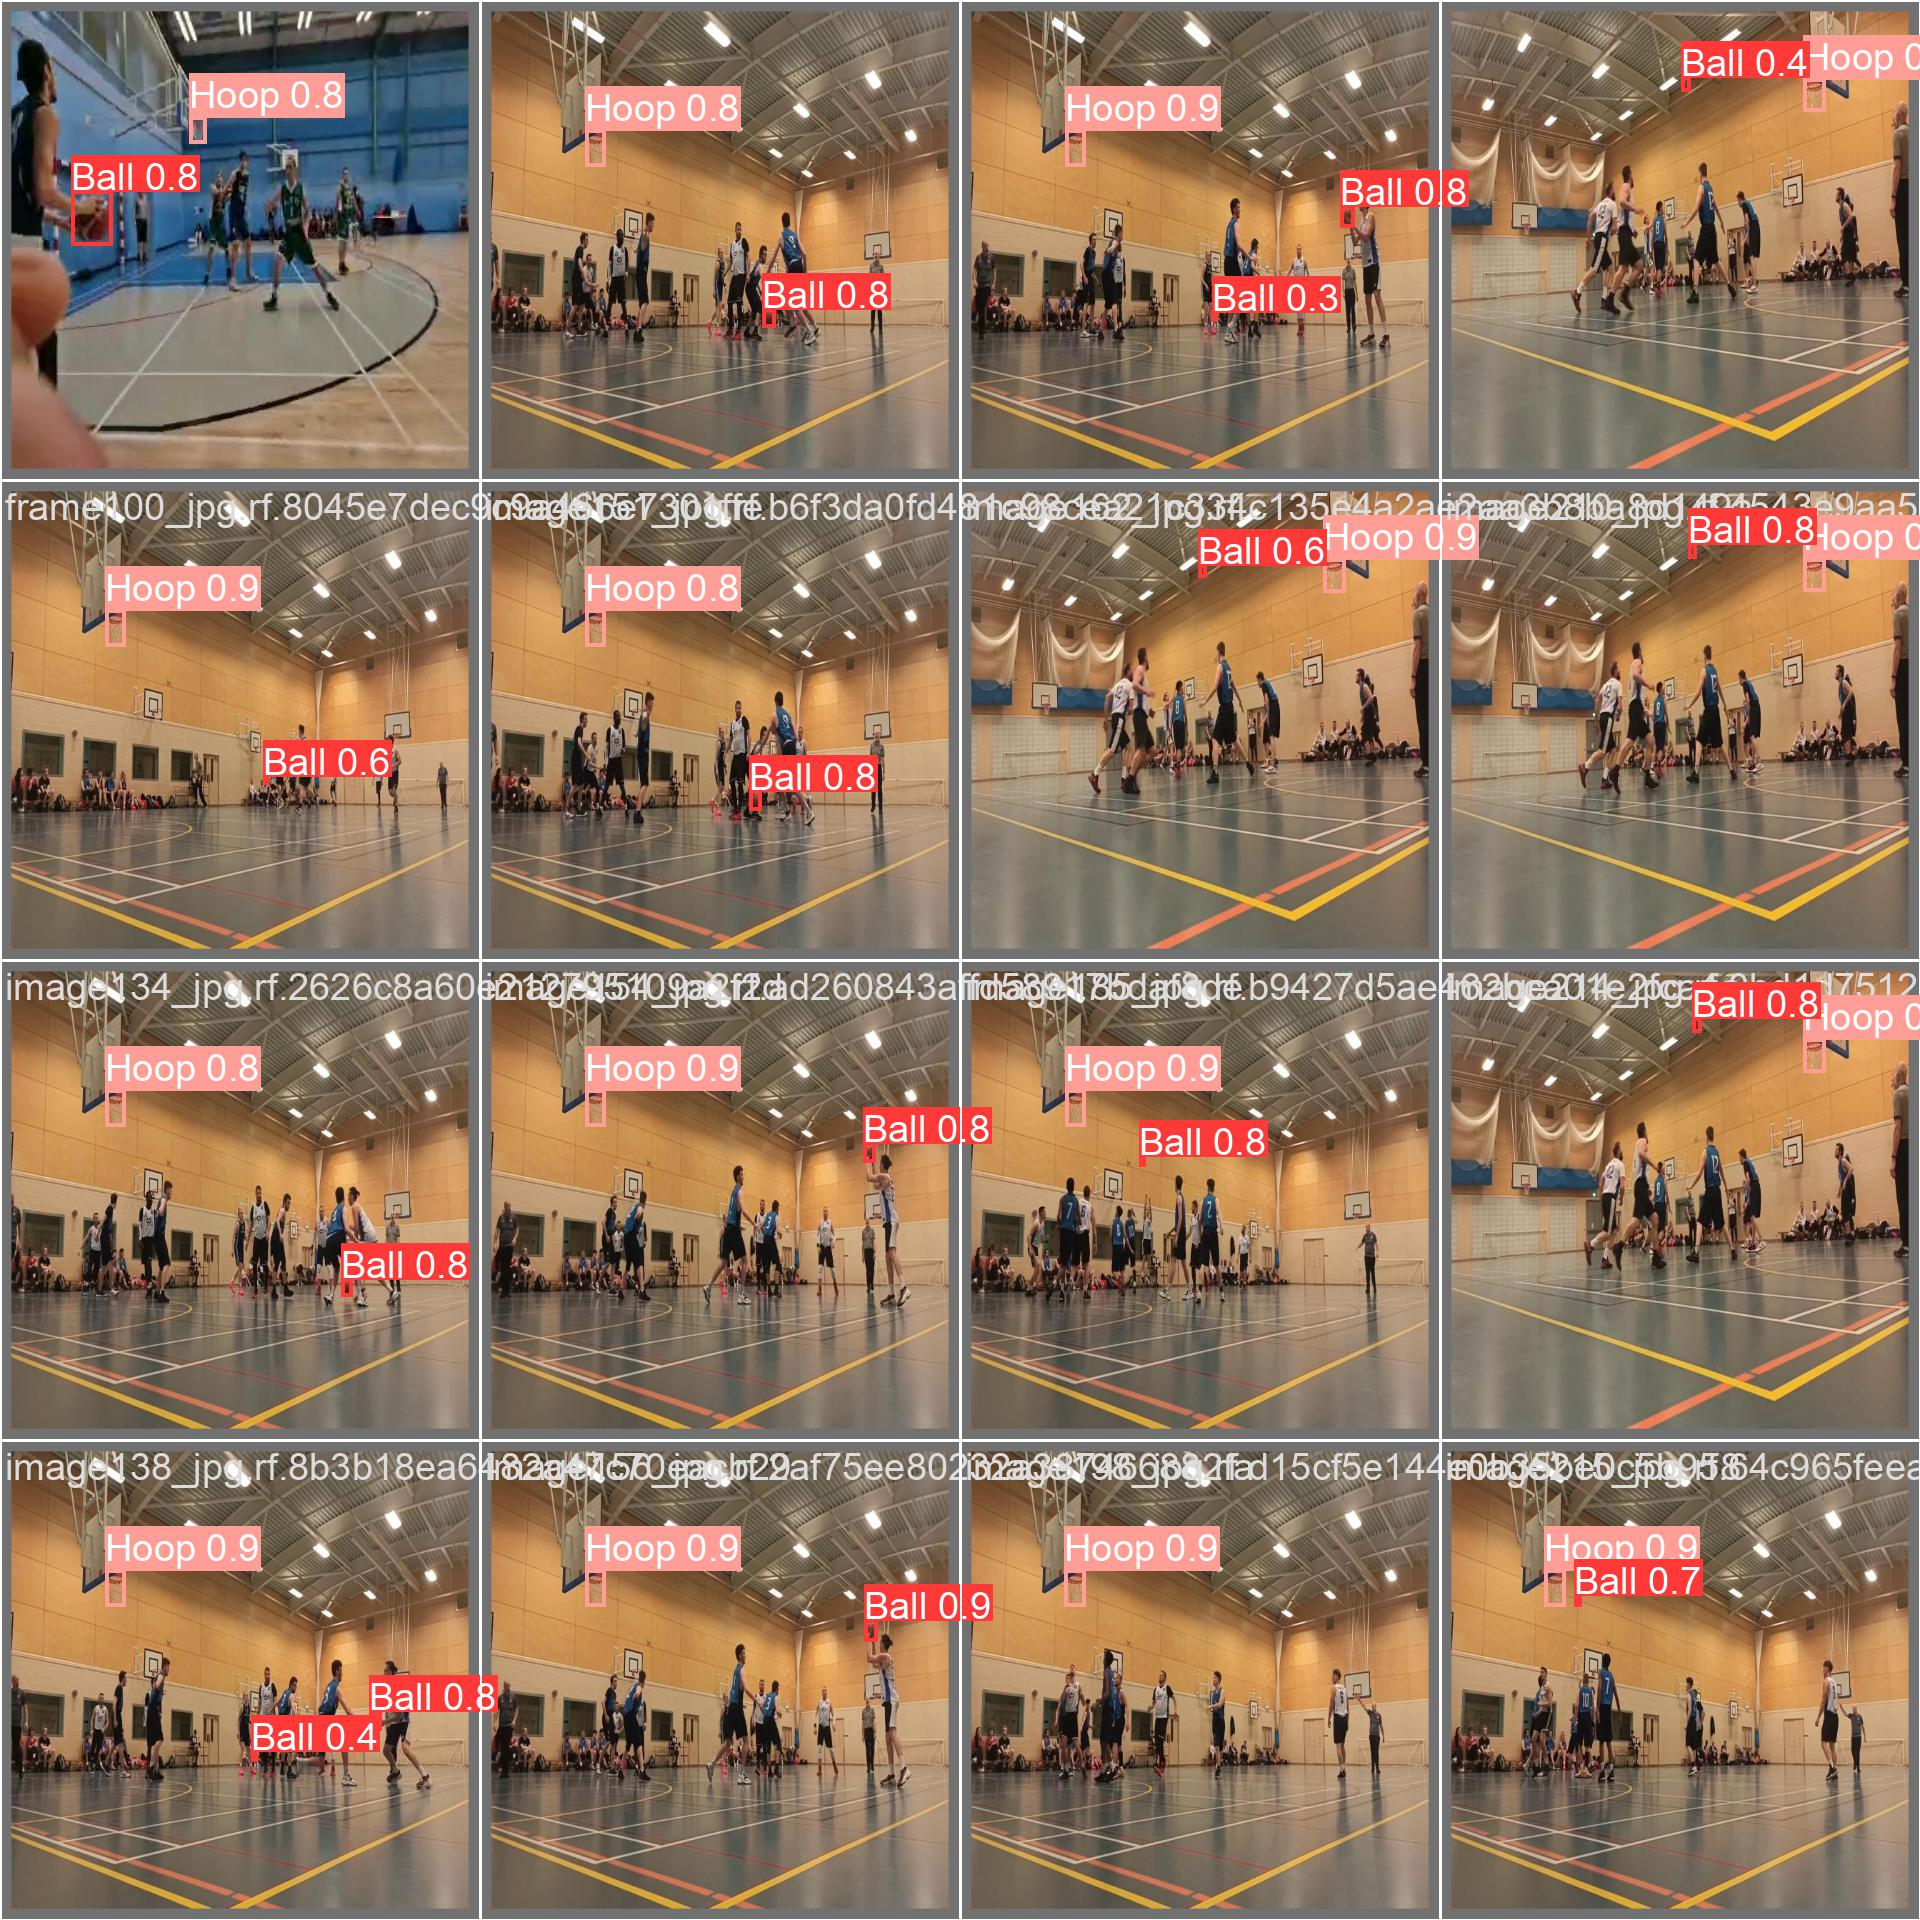

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-24 22:36:10.834753: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 22:36:11.967859: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Ball-Hoop-Tracker-1/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100% 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:04<00:00,  1.22it/s]
                   all         70        139      0.994      0.949      0.971      0.714
                  Ball     

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-06-24 22:36:33.002747: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 22:36:33.842591: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/37 /content/datasets/Ball-Hoop-Tracker-1/test/images/frame143_jpg.rf.8378dec18f84e3b1302bd8a0b2982683.jpg: 640x640 1 Ball, 1 Hoop, 16.3ms
image 2/37 /content/datasets/Ball-Hoop-Tracker-1/test/images/frame144_jpg.rf.0f39b29769051bf0027e5f1f50cb05d0.jpg: 640x640 1 Ball, 1 Hoop, 16.3ms
image 3/37 /content/datasets/Ball-Hoop-Tracker-1/test/images/frame148_jpg.rf.f9738eb37

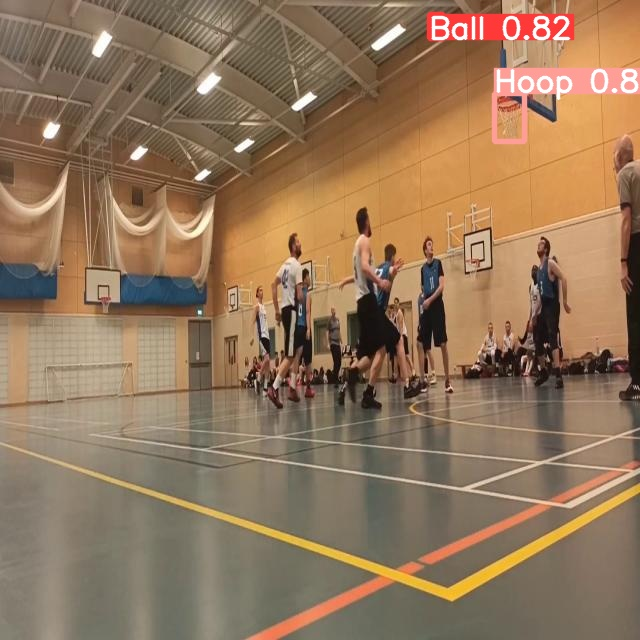

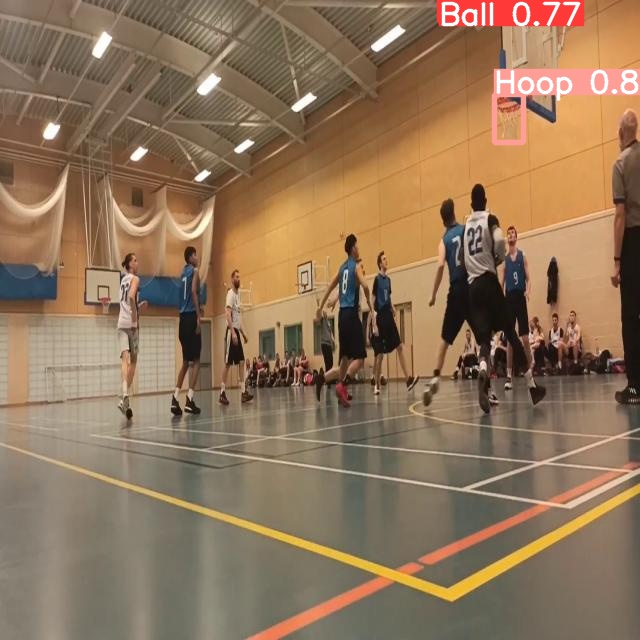

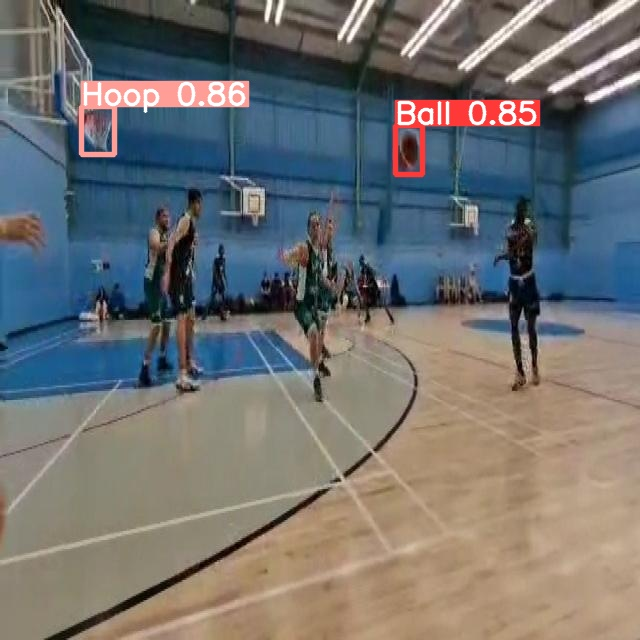

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [2]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/highlights.mp4

'yolo' is not recognized as an internal or external command,
operable program or batch file.
